In [4]:
import pyrealsense2 as rs
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt
import h5py
import os

In [12]:
# Configure depth and color streams
pipeline = rs.pipeline()
config = rs.config()
resolution_width = 480
resolution_height = 270
framerate = 90
config.enable_stream(rs.stream.infrared, 1, resolution_width, resolution_height, rs.format.y8, framerate)
config.enable_stream(rs.stream.infrared, 2, resolution_width, resolution_height, rs.format.y8, framerate)
# config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
# config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

# Start streaming
pipeline.start(config)

### Interesting methods of frame class:

* as_depth_frame
* data
* frame_number
* frame_timestamp_domain
* get_data
* get_depth_frame
* get_frame_metadata
* get_frame_number
* get_frame_timestamp_domain
* get_infrared_frame
* get_timestamp
* timestamp

In [71]:
def append_to_hdf5(f, name, value, axis=0):
    f[name].resize(f[name].shape[axis]+1, axis=axis)
    f[name][-1]=value

In [79]:
datadir = r'D:\DATA\JB\realsense\experiment08'
f = h5py.File(os.path.join(datadir, 'tmp.h5'), 'w')
datatype = h5py.special_dtype(vlen=np.dtype('uint8'))
dset = f.create_dataset('left', (0,), maxshape=(None,),dtype=datatype)
dset = f.create_dataset('right', (0,), maxshape=(None,),dtype=datatype)

In [68]:
f.close()

In [ ]:
n_frames = 100

In [35]:
frames = pipeline.wait_for_frames()
left = frames.get_infrared_frame(1)
right = frames.get_infrared_frame(2)
if not left or not right:
    pass
left, right = np.asanyarray(left.get_data()), np.asanyarray(right.get_data())

In [80]:
# %%timeit
# frames = pipeline.wait_for_frames()
left = frames.get_infrared_frame(1)
right = frames.get_infrared_frame(2)
if not left or not right:
    continue
left, right = np.asanyarray(left.get_data()), np.asanyarray(right.get_data())
ret1, left_jpg = cv2.imencode('.jpg', left, (cv2.IMWRITE_JPEG_QUALITY,80))
ret2, right_jpg = cv2.imencode('.jpg', right, (cv2.IMWRITE_JPEG_QUALITY,80))
if ret1 and ret2:
    append_to_hdf5(f, 'left', left_jpg.squeeze())
    append_to_hdf5(f, 'right', right_jpg.squeeze())

4.64 ms ± 51.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [81]:
f.close()

In [49]:
with h5py.File(os.path.join(datadir, 'tmp.h5'), 'r') as f:
    print(f['left'][:])

[]


In [83]:
decoded = cv2.imdecode(left_jpg,0)

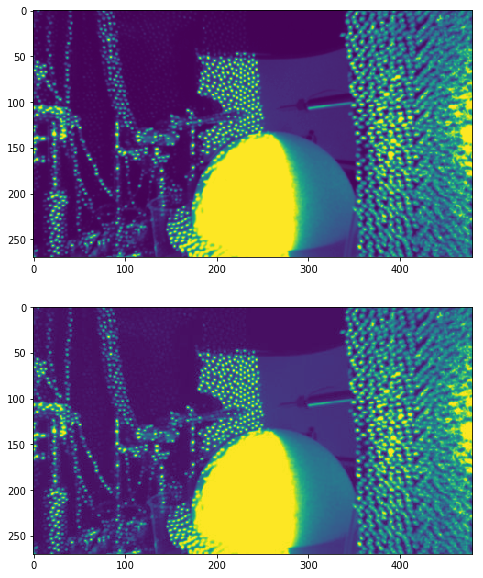

In [84]:
fig, ax = plt.subplots(2,1,figsize=(10,10))
ax[0].imshow(left)
ax[1].imshow(decoded)
plt.show()

In [54]:
pipeline.stop()